Load the `ISLR2` and `tidyverse` packages.

In [5]:
library('ISLR2')
library('tidymodels')
library('tidyverse')

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [6]:
Auto |> glimpse()



Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot mpg as a function of displacement.Plot `mpg`  as a function of `displacement`.

In [7]:
theme_set(theme_gray(base_size = 16))



`geom_smooth()` using formula = 'y ~ x'


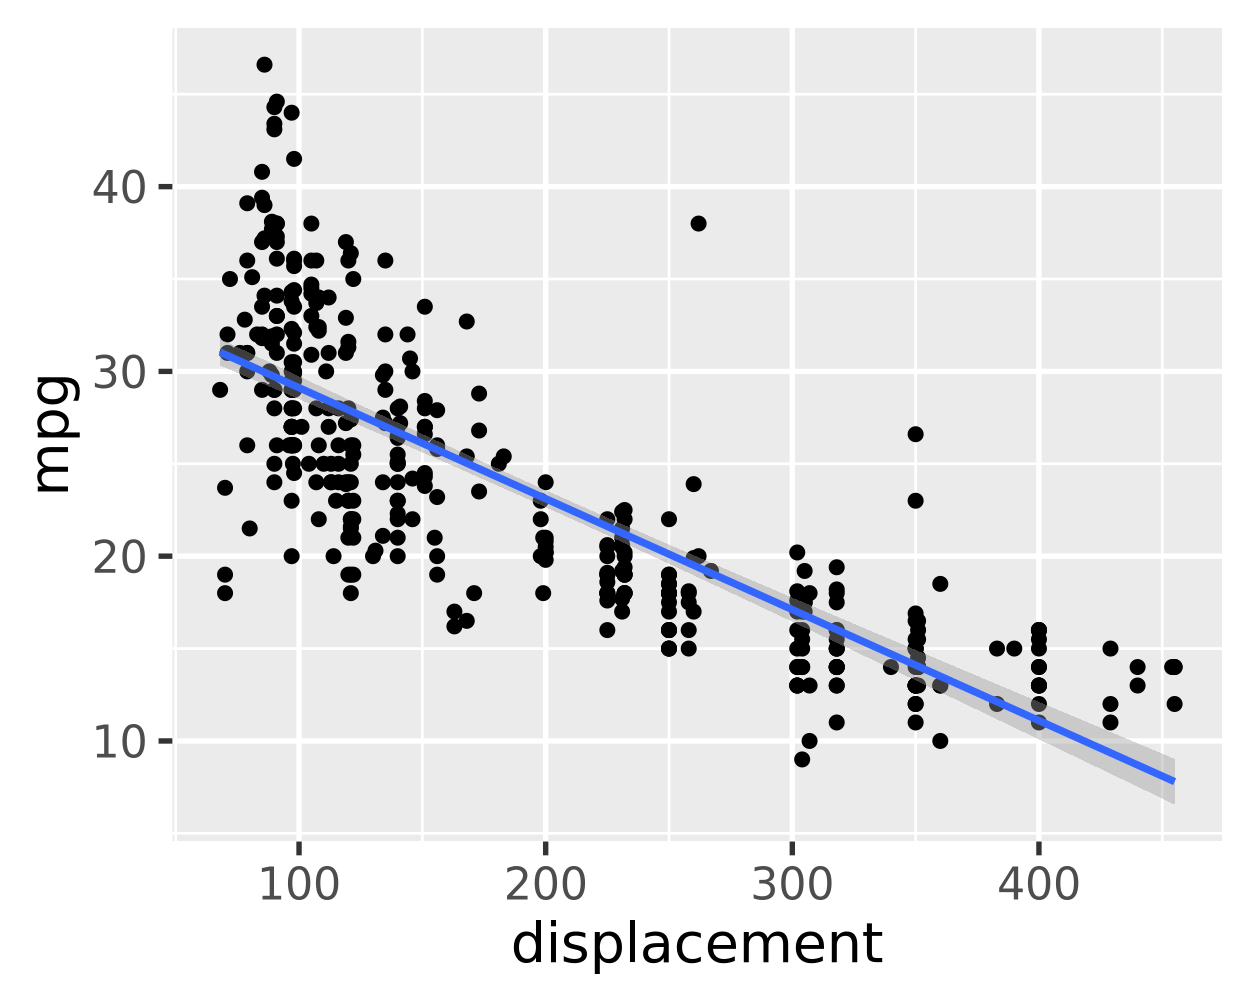

In [8]:
options(repr.plot.height = 4, repr.plot.width = 5)

ggplot(Auto, aes(x = displacement, y = mpg)) +
    geom_point() +
    stat_smooth(method = "lm")

❓Does the relationship of `mpg` to `displacement` look linear?

Yes, there seems to be a linear negative relationship between mpg and displacement.  As mpg increases, so does displacement, however there are many cars in the 100 displacement regardless of mpg over 20.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [9]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) |>
    step_ns(displacement , deg_free = 3) |>
    prep()

juice(rec) |> head()


mpg,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8,displacement_ns_1,displacement_ns_2,displacement_ns_3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0,0,0,1,0.46190391,0.3589048,0.06739428
15,0,0,0,1,0.35827115,0.3451129,0.25669393
18,0,0,0,1,0.44457364,0.3524473,0.11430298
16,0,0,0,1,0.46540576,0.3610567,0.05480333
17,0,0,0,1,0.46743805,0.3625878,0.04645930
15,0,0,0,1,-0.01194771,0.3771541,0.63418745


In [10]:

mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())
mod_fit

parsnip model object


Call:
stats::lm(formula = mpg ~ ., data = data)

Coefficients:
      (Intercept)         cyl_cat_X4         cyl_cat_X5         cyl_cat_X6  
            21.32              14.42              16.50              13.56  
       cyl_cat_X8  displacement_ns_1  displacement_ns_2  displacement_ns_3  
            12.15             -13.16             -29.57             -14.61  


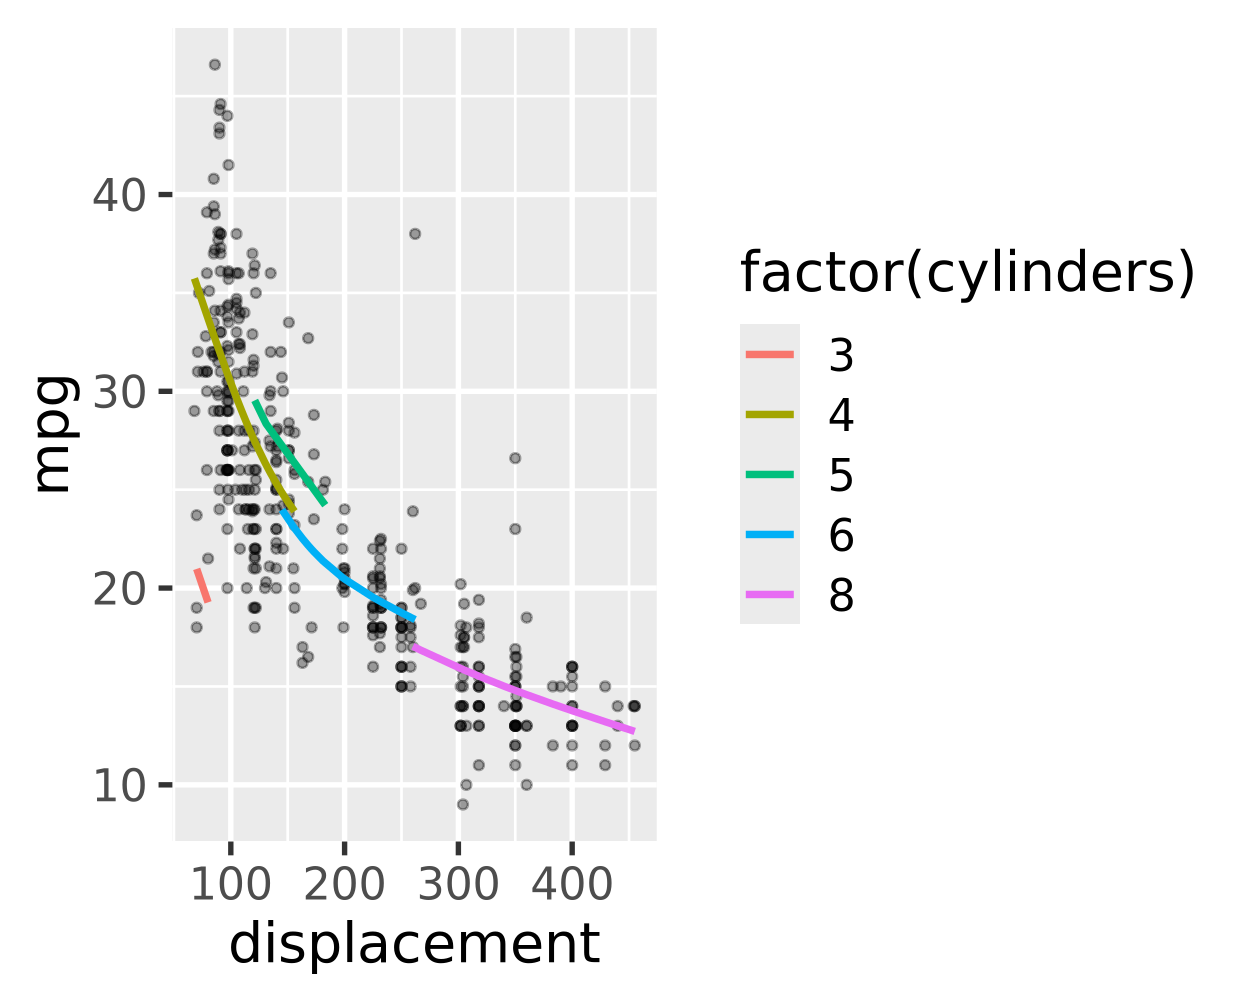

In [11]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)